<a href="https://colab.research.google.com/github/felipebmuniz/anlise-de-dados-TRB1/blob/main/analise/estatisticaDescritivaCasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medidas de Posição e Tendência Central

Importando as bibliotecas

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [7]:
from scipy.stats.mstats import gmean,hmean
from scipy import stats

**Média Aritmética (MA) - É a soma de todos os elementos do conjunto, divididos pelo número de elementos que compõe o conjunto.**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c938ca170f8c4a5d2dddecabc5ae1d5eb5f35a2b)

In [ ]:
dados = [1,2,5,3,4]

In [ ]:
np.mean(dados)

3.0

**Média Geométrica (MG) - É a raíz n-ésima do produto de todos os elementos que compõe o conjunto.**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/82fb3d898a5de7ae016b07855c335ce570350410)

In [ ]:
gmean(dados)

2.6051710846973517

**Média Harmônica (MH) - É o número de elementos, divididos pela soma dos inversos dos elementos que compõem o conjunto.**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5335415727099e38ba27a1775613020dc4b584de)

In [ ]:
hmean(dados)

2.18978102189781

## Quando usar cada uma das médias?

### Funções para plotar gráficos

In [1]:
def plot_lines(dados, valor_central):
  if valor_central in dados:
    posicao_central = dados.index(valor_central)+1
  else:
    dados.append(valor_central)
    dados.sort()
    posicao_central = dados.index(valor_central)+1
  
  posicoes = np.arange(1,len(dados)+1,1)
  plt.figure(figsize=(8,6))
  plt.plot(posicoes,dados,'o-', color='red',ms=15)
  plt.plot(posicao_central, valor_central, 'o-',color='blue',ms=15)
  plt.show()

In [2]:
def plot_line_means(dados, mean, gmean,hmean):
  posicoes_centrais=[]
  y=[]
  x = dados
  
  for m in [mean,gmean,hmean]:
    x.append(m)
  
  x.sort()
  for m in [mean,gmean,hmean]:
    if m in x:
      posicoes_centrais.append(x.index(m)+1)
  
  print("Dados: {}".format(x))
  print("Media aritmética: {}, Média Geométrica: {}, Média Harmonica: {}".format(mean,gmean,hmean))
  
  y = np.arange(1,len(x)+1,1)
  
  plt.figure(figsize=(8,6))
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b'])))
  plt.plot(y,x,'o-', color='black',ms=15)
  medias = ['MA','MG','MH'] 
  i=0
  for posicao_central,valor_central in zip(posicoes_centrais,[mean,gmean,hmean]):
    plt.plot(posicao_central, valor_central, 'o-',ms=15)
    plt.text(x=posicao_central+0.2, y=valor_central+0.2, s=medias[i], alpha=0.7, color='#334f8d')
    i+=1

  plt.show()

In [3]:
def plot_lines_horizontal(dados,valor_central):
  plt.figure(figsize=(10,6))
  y = 0
  plt.hlines(y, min(dados), max(dados))
  for n in dados:
    if n == valor_central:
      plt.plot(n,y, 'o', ms = 15, color='blue')
      continue  
    plt.plot(n,y, 'o', ms = 15, color = 'red')

### Considere os cenários

Exemplo de dados gerados a partir de uma **operação de adição**, a soma do valor 3 em cada elemento do vetor (relacionamento linear)

In [4]:
dados_linear = [1, 4, 7, 10, 13, 16, 19]

Calculando a média aritmética

In [8]:
media = int(np.mean(dados_linear))

In [ ]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 10


Plotando os dados e seu valor central

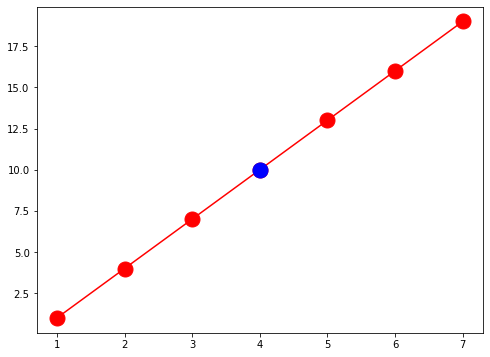

In [9]:
plot_lines(dados_linear,media)

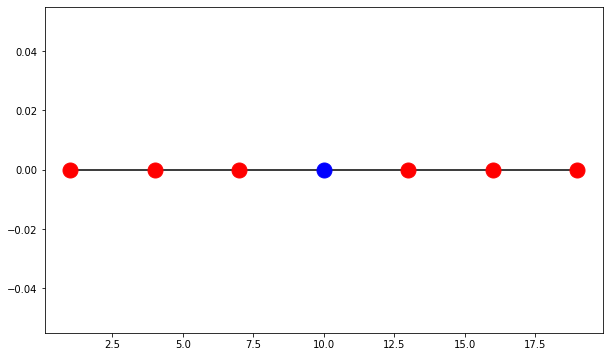

In [ ]:
plot_lines_horizontal(dados_linear,media)

Exemplo de dados gerados a partir de uma **operação de multiplicação**, a multiplicação de cada elemento pelo valor de 3 (relacionamento exponencial)

In [10]:
dados_exponencial = [1, 3, 9, 27, 81, 243, 729]

Calculando a média aritmética.

(1 + 3 + 9 + 27 + 81 + 243 + 729) ÷ 7 = **156.1**

In [11]:
media = int(np.mean(dados_exponencial))

In [12]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 156


Plotando os dados e seu valor central.

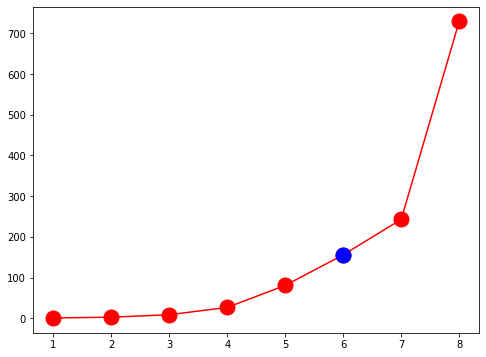

In [13]:
plot_lines(dados_exponencial,media)

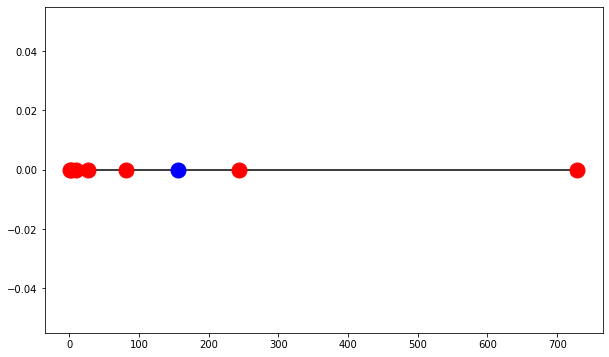

In [14]:
plot_lines_horizontal(dados_exponencial,media)

Considerando agora a aplicação da média geométrica.

Especificando os mesmos dados com um relacionando exponencial.

In [15]:
dados_exponencial = [1, 3, 9, 27, 81, 243, 729]

Calculando a média geométrica.

(1 * 3 * 9 * 27 * 81 * 243 * 729) = 10,460,353,203

Raiz sétima (7) de **10,460,353,203** = 27

In [16]:
media_geo = int(gmean(dados_exponencial))

In [17]:
print("Valor da média geométrica dos dados: {}".format(media_geo))

Valor da média geométrica dos dados: 27


Plotando os dados e seu valor central.

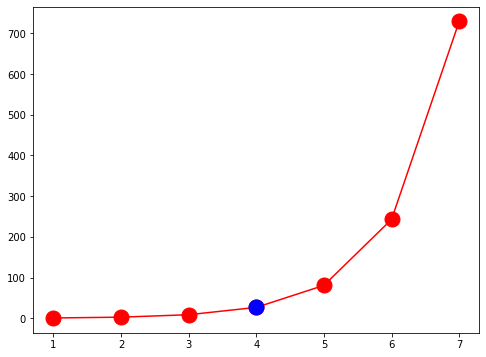

In [18]:
plot_lines(dados_exponencial,media_geo)

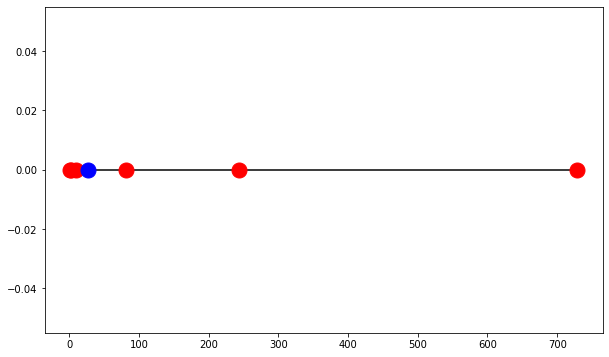

In [19]:
plot_lines_horizontal(dados_exponencial,media_geo)

### Considerações importantes

*   A **média aritmética** produz um resultado interessante quando temos um **relacionamento aditivo** entre os números da amostra.
*   Este relacionamento é chamado linear pois, ao exibir graficamente os valores tendem a seguir uma linha ascendente ou descendente.
*   Já a **média geométrica** é mais apropriada quando temos uma amostra com um **relacionamento multiplicativo** ou exponencial.


*   A diferença entre as médias é que enquanto a média aritmética faz a **soma** de todos os elementos e depois a **divisão**, a média geométrica atua com a **multiplicação** entre os elementos e depois reescala através da **raiz** os valores para a mesma unidade da amostra.








# Comparando as médidas em um cenário real.
### Verificando os valores de avaliações de dois cafés.
### Hard Rock Café Gramado vs Hard Rock Café Curitiba.

![alt text](https://media-cdn.tripadvisor.com/media/photo-s/13/df/fc/f0/fachada-hard-rock-cafe.jpg)
![alt text](https://media-cdn.tripadvisor.com/media/photo-s/1a/2e/c8/db/hard-rock-cafe-curitiba.jpg)

**Hard Rock Café Gramado**
*   Avaliações no TripAdvisor: 3,5
*   Índice de Satisfação dos Clientes: 89%

**Hard Rock Café Curitiba**
*   Avaliaçõs no TripAdvisor: 4,5
*   Índice de Satisfação dos Clientes: 75%


Aplicação de verificar o estabelecimento com a melhor avaliação em diferentes escalas.

Calculando a média aritmética

In [20]:
aval_gramado,aval_curitiba = 3.5, 4.5
indice_gramado,indice_curitiba = 89, 75

In [21]:
print("Média para Gramado: {}".format(np.mean([aval_gramado,indice_gramado])))
print("Média para Curitiba: {}".format(np.mean([aval_curitiba,indice_curitiba])))

Média para Gramado: 46.25
Média para Curitiba: 39.75


Considerando a média aritmética o Hard Rock Café de Gramado é o estabelecimento melhor avaliado.

Agora vamos considerar a possibilidade de fazer uma reescala dos dados de avaliação do trip advisor.

In [22]:
print("Valores reescalados: {},{}".format(aval_gramado*20,aval_curitiba*20))

Valores reescalados: 70.0,90.0


Calculando a média aritmética

In [23]:
print("Média para Gramado: {}".format(np.mean([aval_gramado*20,indice_gramado])))
print("Média para Curitiba: {}".format(np.mean([aval_curitiba*20,indice_curitiba])))

Média para Gramado: 79.5
Média para Curitiba: 82.5


Considerando o mesmo cenário agora utilizando a média geométrica.

In [24]:
print("Média Geométrica para Gramado: {}".format(gmean([aval_gramado,indice_gramado])))
print("Média Geométrica para Curitiba: {}".format(gmean([aval_curitiba,indice_curitiba])))

Média Geométrica para Gramado: 17.64936259472279
Média Geométrica para Curitiba: 18.371173070873837


### Considerações
*   Os valores alterados para a mesma escala nos deram **resultados diferentes** mais próximos da realidade.
*   Utilizando a média geométrica já nos entrega o resultado "correto" pois considera o **relacionamento multiplicativo** entre os dados da amostra.
*   É importante notar que aplicando a média geométrica para os dados em **diferentes escalas** o retorno não está na mesma unidade da amostra.




## Média harmônica.

![alt text](https://images.unsplash.com/photo-1469854523086-cc02fe5d8800?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=500&q=60)


Percurso Total da Viagem 10km
*   CAMINHO DE IDA = 30km/h
*   CAMINHO DE VOLTA = 10km/h




**Qual a velocidade média da viagem?**

Usando a média aritmética

In [25]:
np.mean([30,10])

20.0

**VIAGEM DE IDA - 5km à 30km/h**
*   30 km por 60 minutos = 1 km a cada 2 minutos = 1/2 km por minuto.
*   5km a 1/2 km por minuto = 10 minutos.


**VIAGEM DE VOLTA - 5km à 10km/h**
*   10 km por 60 minutos = 1 km a cada 6 minutos = 1/6 km por minuto.
*   5 km a 1/6 km por minuto = 30 minutos.

Tempo total da viagem = 40 minutos

Proporção da viagem de ida em relação ao tempo total da viagem.

In [26]:
print("Proporção de tempo da viagem de ida em relação ao tempo total da viagem: {}%".format((10/40)*100))

Proporção de tempo da viagem de ida em relação ao tempo total da viagem: 25.0%


In [27]:
print("Proporção de tempo da viagem de volta em relação ao tempo total da viagem: {}%".format((30/40)*100))

Proporção de tempo da viagem de volta em relação ao tempo total da viagem: 75.0%


Calculando a Média Aritmética Ponderada.

In [28]:
np.average([30,10], weights=[.25,.75])

15.0

In [29]:
hmean([30,10])

15.0

### As médias seguem um relacionamento ordinal: **média harmônica < média geométrica < média aritmética**.

Considerando os dados com o relacionamento aditivo.

In [30]:
dados = [1, 4, 7, 10, 13, 16, 19]

In [31]:
media_aritmetica,media_geometrica,media_harmonica = round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [32]:
media_aritmetica,media_geometrica,media_harmonica

(10.0, 7.3, 4.15)

Visualizando graficamente.

Dados: [1, 4, 4.15, 7, 7.3, 10, 10.0, 13, 16, 19]
Media aritmética: 10.0, Média Geométrica: 7.3, Média Harmonica: 4.15


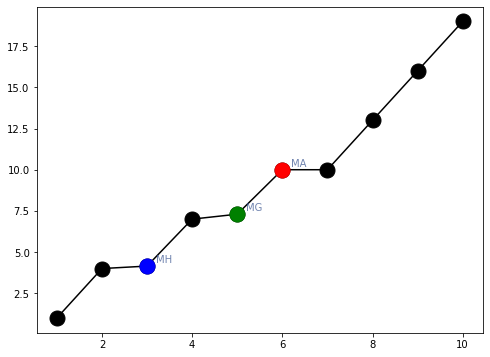

In [33]:
plot_line_means(dados,media_aritmetica,media_geometrica,media_harmonica)

Considerando os dados com o relacionamento multiplicativo.

In [34]:
dados = [1, 3, 9, 27, 81, 243, 729]

In [35]:
media_aritmetica,media_geometrica,media_harmonica = round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [36]:
media_aritmetica,media_geometrica,media_harmonica

(156.14, 27.0, 4.67)

Visualizando graficamente.

Dados: [1, 3, 4.67, 9, 27, 27.0, 81, 156.14, 243, 729]
Media aritmética: 156.14, Média Geométrica: 27.0, Média Harmonica: 4.67


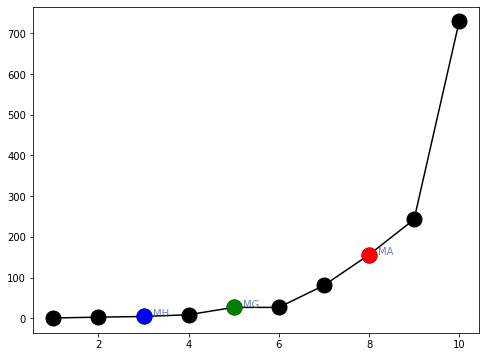

In [37]:
plot_line_means(dados,media_aritmetica,media_geometrica,media_harmonica)

**Moda - Valores mais frequentes da distribuição**

In [38]:
dados=[4,5,4,6,5,8,4]

In [39]:
stats.mode(dados)

ModeResult(mode=array([4]), count=array([3]))

In [40]:
dados_bimodal=[4,5,4,6,5,8,4,4,5,5]

In [41]:
from collections import Counter

In [42]:
def calcula_moda(dados):
  number_counts = Counter(dados)
  print(number_counts)
  modes = [val for val,count in number_counts.items() if count == max(number_counts.values())]
  return modes

In [43]:
calcula_moda(dados_bimodal)

Counter({4: 4, 5: 4, 6: 1, 8: 1})


[4, 5]

In [44]:
dados_amodal=[1,2,3,4,5]

In [45]:
calcula_moda(dados_amodal)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})


[1, 2, 3, 4, 5]

**Mediana - É o valor da variável que divide os dados ordenados em duas partes de igual frequência.**

In [46]:
dados_mediana7 = [7,1,5,2,3,1,6]

In [47]:
np.sort(dados_mediana7)

array([1, 1, 2, 3, 5, 6, 7])

In [48]:
np.median(dados_mediana7)

3.0

In [49]:
dados_mediana8 = [1,2,1,1,4,5,3,6]

In [50]:
np.sort(dados_mediana8)

array([1, 1, 1, 2, 3, 4, 5, 6])

In [51]:
np.median(dados_mediana8)

2.5

# Medidas Separatrizes

In [52]:
notas = [13,25,69,72,33,41,28,17,65]

In [53]:
np.sort(notas)

array([13, 17, 25, 28, 33, 41, 65, 69, 72])

**Q1 - Primeiro Quartil**

In [54]:
np.quantile(notas,.25)

25.0

**Q2 - Segundo Quartil**

In [55]:
np.quantile(notas,.50)

33.0

Comparando com o valor da Mediana

In [56]:
np.median(notas)

33.0

**Q3 - Terceiro Quartil**

In [57]:
np.quantile(notas,.75)

65.0

**P25 - Percentil 25 = Q1**

In [58]:
np.percentile(notas,25)

25.0

**P50 - Percentil 50 = Q2**


In [59]:
np.percentile(notas,50)

33.0

**P75 - Percentil 75 = Q3**

In [60]:
np.percentile(notas,75)

65.0

## Medidas de Variação e Dispersão

In [61]:
dados_dispersao = [10,20,30,40,50,60,70,80,90,100]

**Média**

In [62]:
np.mean(dados_dispersao)

55.0

**Variância**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c2446a06b779245a22147449fc523f2b1b0013ef)

In [63]:
np.var(dados_dispersao)

825.0

**Desvio Padrão**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/cc45b72e1fd6a3de3ec4977f42367f104f57583f)

In [64]:
np.std(dados_dispersao)

28.722813232690143

**Coeficiente de Variação**

In [65]:
stats.variation(dados_dispersao)

0.5222329678670935

Importante: Um coeficiente de variação **menor que 25%** é um bom indicativo de homogeneidade dos dados, ou seja, os dados não variam tanto a partir da média.

In [66]:
media=np.mean(dados_dispersao)
desvio_padrao = np.std(dados_dispersao)

In [67]:
desvio_padrao/media

0.5222329678670935

# Exemplo usando o Pandas

Importando as bibliotecas.

In [81]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Carregando a base de dados.

In [ ]:
#montando conexão com o Drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
#copiar o diretório do arquivo CSV no seu Drive com o dataset a ser analisado
# df = pd.read_csv("/content/drive/MyDrive/Ciencia-Dados/cars.csv")
url="https://raw.githubusercontent.com/felipebmuniz/anlise-de-dados-TRB1/main/base/cars.csv"
df = pd.read_csv(url)

Verificando os dados.

In [96]:
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


Verificando as informações do conjunto de dados.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Limpando os dados do atributo MSRP.

In [98]:
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]

Verificando os dados após limpeza.

In [99]:
df['MSRP'].head(5)

0    36945
1    23820
2    26990
3    33195
4    43755
Name: MSRP, dtype: object

Verificando as informações do conjunto de dados.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Transformando os dados para o formato numérico.

In [101]:
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 50.3+ KB


In [103]:
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


Calculando a média aritmética.

In [104]:
df["MSRP"].mean()

32774.85514018692

In [105]:
msrp = df["MSRP"]

In [106]:
msrp.mean()

32774.85514018692

Média geométrica

In [107]:
gmean(msrp)

28841.635198804073

Média Harmônica

In [108]:
hmean(msrp)

25837.78463669279

Mediana

In [109]:
msrp.median()

27635.0

Moda

In [110]:
msrp.mode()

0     13270
1     15389
2     19635
3     19860
4     21055
5     21595
6     23495
7     23895
8     25700
9     27490
10    28495
11    29995
12    31545
13    33995
14    34495
15    35940
16    49995
17    74995
dtype: int64

Variação

In [111]:
msrp.var()

377591612.88763136

Desvio padrão

In [112]:
msrp.std()

19431.716673717518

Valor máximo.

In [113]:
msrp.max()

192465

Valor mínimo

In [114]:
msrp.min()

10280

# Medidas de Assimetria
Nos possibilitam analisar uma distribuição em relação a sua moda, mediana e média.

In [68]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import kurtosis, skew
%matplotlib inline

Função para calcular estatísticas.

In [69]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

Considere a seguinte amostra.

In [71]:
s0 = [4,5,6,5,5,6,6,5,4,5,5,5]

In [72]:
calcula_estatisticas(s0)

Media: 5.08
Moda: 5.0
Mediana: 5
Variância: 0.41
Desvio Padrão: 0.64
Coeficiente Person: -0.08
Coeficiente de Kurtosi: -0.58


Distribuição Simétrica - Média = Moda = Mediana.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


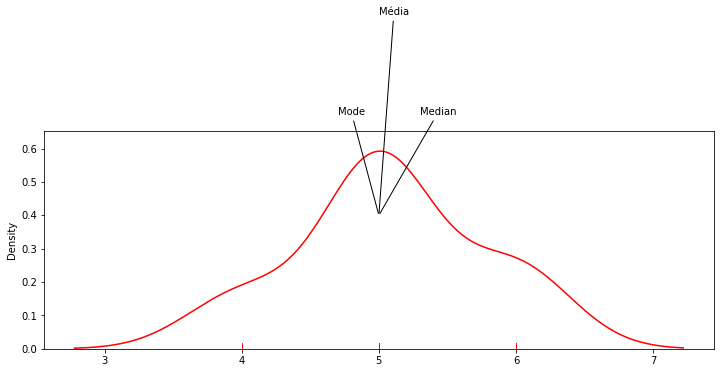

In [74]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(s0,rug=True,kde=True,hist=False)

ax.annotate('Mode', xy=(5, 0.4), xytext=(4.7, 0.7),arrowprops={'arrowstyle': '-'})         
ax.annotate('Median', xy=(5, 0.4), xytext=(5.3, 0.7),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(5, 0.4), xytext=(5.0, 1), arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)

Considere a segunda amostra.

In [75]:
s1 = [12,8.0, 4, 3, 2,1,1]

In [76]:
calcula_estatisticas(s1)

Media: 4.43
Moda: 3.0
Mediana: 1.0
Variância: 14.53
Desvio Padrão: 3.81
Coeficiente Person: 0.98
Coeficiente de Kurtosi: -0.45


Asimétrica Positiva / à direita - Média > Moda > Mediana

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


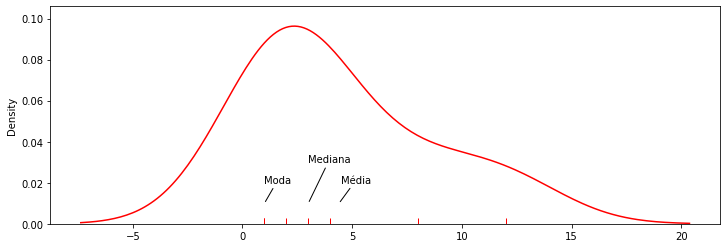

In [77]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(s1,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(1,0.01), xytext=(1, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(3, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(4.4, 0.01), xytext=(4.5, 0.02),arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de 1 a distribuição é assimétrica positiva

Considere a terceira amostra

In [78]:
s2 = [-3,-1,4,2.5,4,3]

In [79]:
calcula_estatisticas(s2)

Media: 1.58
Moda: 2.75
Mediana: 4.0
Variância: 7.03
Desvio Padrão: 2.65
Coeficiente Person: -0.73
Coeficiente de Kurtosi: -1.12


Asimétrica negativa / à esquerda - Média < Moda < Mediana

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


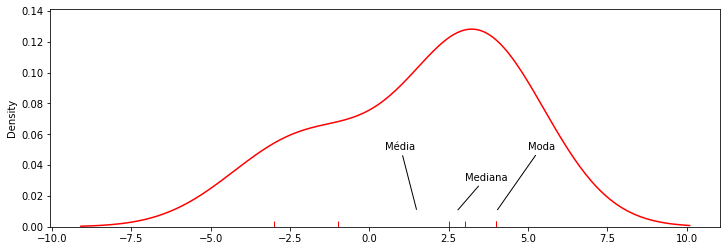

In [80]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(s2,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(4,0.01), xytext=(5, 0.05),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(2.75, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(1.5, 0.01), xytext=(0.5, 0.05),arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de -1 a distribuição é assimétrica negativa.

### Gerando dados aleatórios

Amostra seguindo uma distribuição normal

In [ ]:
sample_normal = np.random.normal(1,0.5,500)

In [ ]:
sample_normal[:10]

In [ ]:
calcula_estatisticas(sample_normal)

Visualizando a distribuição

In [ ]:
fig = plt.figure(figsize=(12, 4))
sns.distplot(sample_normal)

Distribuição simétrica, com o coeficiente de pearson próximo a zero.

Considere o seguinte exemplo

In [ ]:
exp = np.arange(2,len(sample_normal),2)

Verificando os expoentes

In [ ]:
exp[:10]

Gerando uma distribuição assimétrica positiva

In [ ]:
sample_assimetrica_positiva = []
for s,e in zip(sample_normal,exp):
    sample_assimetrica_positiva.append(s*e)

In [ ]:
calcula_estatisticas(sample_assimetrica_positiva)

Visualizando a distribuição

In [ ]:
sns.distplot(sample_assimetrica_positiva)

Gerando uma distribuição assimétrica negativa.

In [ ]:
exp = (np.arange(2,len(sample_normal),2))*-1

Verificando os expoêntes

In [ ]:
exp[:10]

In [ ]:
sample_assimetrica_negativa = []
for s,e in zip(sample_normal,exp):
    sample_assimetrica_negativa.append(s*e)

In [ ]:
calcula_estatisticas(sample_assimetrica_negativa)

Visualizando a distribuição

In [ ]:
sns.distplot(sample_assimetrica_negativa)

Verificando graficamente as distribuições dos atributos do Dataframe

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(16, 12))
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(df[column],ax=axes[i//3,i%3])

Verificando a distribuição de probabilidade e a diferença entre a média e a mediana.

In [ ]:
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    media = round(df[column].mean(),2)
    std = df[column].std()
    cvar = round(std/media*100,2)
    median = df[column].median()
    print("Atributo: {}, Coeficiente de Variação: {} %, Media: {}, Mediana: {}".format(column,cvar,media,median))

# <b>Exercício</b>

## Faça a avaliação de quatro datasets atualmente recuperados pela biblioteca sktlearn, como segue:

- Iris: https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset
- Diabetes: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
- Wine (Vinhos): https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset
- California Housing (imóveis na California): https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

Observe como se comporta a distribuição dos dados em cada atributo e suas correspondentes estatíticas descritivas.

In [ ]:
# sugestões de como recuperar os datasets através da biblioteca scikit-learn
# carregando dataset Iris
from sklearn.datasets import load_iris
dataIris = load_iris()

# carregando dataset Diabetes
from sklearn.datasets import load_diabetes
dataDiabetes = load_diabetes()

# carregando dataset Wine
from sklearn.datasets import load_wine
dataWine = load_wine()

# carregando dataset California Housing
from sklearn.datasets import fetch_california_housing
dataCalifornia = fetch_california_housing()

# <b>Treinando a manipulação do dataset (IRIS)</b>

## Usando os exemplos do site da Scikit Learn

- IRIS:


Carregamento da biblioteca da iris

In [ ]:
from sklearn.datasets import load_iris

Chamada e set dos valores dos dados

In [ ]:
iris = load_iris()
iris.target[[10, 25, 50]]

array([0, 0, 1])

In [ ]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

Mudança da passagem dos valores para uma notação da scikit learn:

In [ ]:
X,y = load_iris(return_X_y=True)

Modificando os dados para uma visualização de dataframe usando o pandas:

Importação da biblioteca de dataframe

In [ ]:
import pandas as pd

Definindo os valores para a tabela do dataframe da v=base de dados da iris.

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Adicionando uma nova coluna para a análise dos dados.

In [ ]:
iris_df['target'] = iris.target

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Definindo uma nova amostragem na tabela pra mostrar os nomes dos tipos das amostras.

In [ ]:
iris_df['target names'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Realizando uma plotagem dos dados para amostragem: 

In [ ]:
%matplotlib inline

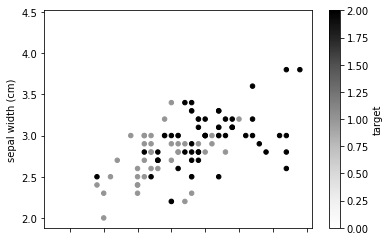

In [ ]:
iris_df.plot.scatter('sepal length (cm)', 'sepal width (cm)', c='target')

Executando o pré-processamento e dividindo os dados em teste e treinamento.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(105, 4)

In [ ]:
X_test.shape

(45, 4)

# <b>Treinando a manipulação do dataset (Diabetes)</b>

## Usando os exemplos do site da Scikit Learn

- Diabetes:


Carregamento da biblioteca da iris

In [ ]:
from sklearn.datasets import load_diabetes

Chamada e set dos valores dos dados

In [ ]:
diabetes = load_diabetes()
diabetes.target[[10, 25, 50]]

array([101., 202., 155.])

In [ ]:
list(diabetes.target_filename)

Mudança da passagem dos valores para uma notação da scikit learn:

In [ ]:
X,y = load_diabetes(return_X_y=True)

Modificando os dados para uma visualização de dataframe usando o pandas:

Importação da biblioteca de dataframe

In [ ]:
import pandas as pd

Definindo os valores para a tabela do dataframe da v=base de dados da iris.

In [ ]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [ ]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


Adicionando uma nova coluna para a análise dos dados.

In [ ]:
diabetes_df['target'] = diabetes.target

In [ ]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Definindo uma nova amostragem na tabela pra mostrar os nomes dos tipos das amostras.

In [ ]:
# diabetes_df['target filename'] = pd.Categorical.from_codes(diabetes.target, diabetes.target_filename)

In [ ]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Realizando uma plotagem dos dados para amostragem: 

In [ ]:
%matplotlib inline

In [ ]:
# diabetes_df.plot.scatter('sepal length (cm)', 'sepal width (cm)')

Executando o pré-processamento e dividindo os dados em teste e treinamento.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(124, 13)

In [ ]:
X_test.shape

(54, 13)

# <b>Treinando a manipulação do dataset (WINE)</b>

## Usando os exemplos do site da Scikit Learn

- WINE:


Carregamento da biblioteca da iris

In [ ]:
from sklearn.datasets import load_wine

Chamada e set dos valores dos dados

In [ ]:
dataWine = load_wine()
dataWine.target[[10, 25, 50]]

array([0, 0, 0])

In [ ]:
list(dataWine.target_names)

['class_0', 'class_1', 'class_2']

Mudança da passagem dos valores para uma notação da scikit learn:

In [ ]:
X,y = load_wine(return_X_y=True)

Modificando os dados para uma visualização de dataframe usando o pandas:

Importação da biblioteca de dataframe

In [ ]:
import pandas as pd

Definindo os valores para a tabela do dataframe da v=base de dados da iris.

In [ ]:
dataWine_df = pd.DataFrame(data=dataWine.data, columns=dataWine.feature_names)

In [ ]:
dataWine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Adicionando uma nova coluna para a análise dos dados.

In [ ]:
dataWine_df['target'] = dataWine.target

In [ ]:
dataWine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Definindo uma nova amostragem na tabela pra mostrar os nomes dos tipos das amostras.

In [ ]:
dataWine_df['target names'] = pd.Categorical.from_codes(dataWine.target, dataWine.target_names)

In [ ]:
dataWine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


Realizando uma plotagem dos dados para amostragem: 

In [ ]:
%matplotlib inline

In [ ]:
# dataWine_df.plot.scatter('sepal length (cm)', 'sepal width (cm)', c='target')

Executando o pré-processamento e dividindo os dados em teste e treinamento.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(124, 13)

In [ ]:
X_test.shape

(54, 13)